# 08-01: Connectivity Phase Transition

*December 7th 2022*  

We study the size of the largest connected component in random graphs generated by the Erdös-Renyi model.

In [1]:
import pathpy as pp
import numpy as np

from collections import Counter

from tqdm import tqdm_notebook as tqdm

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
sns.set_style("whitegrid")

We study the size of the largest connected component in random graphs generated by the $G(n,p)$ model. In particular, we are interested in the question how the size of the largest connected component depends on the connection parameter $p$, and how large $p$ has to be in order to obtain a network in which (almost) all nodes are in the largest connected component.

The following function plots the largest connected component size as a function of $p$ for 20 uniformly spaced samples in the range of $[0, 0.05]$. We repeat our experiment for a number of nodes of $n = 100, 200, 500$ and check how the shape of the curve changes:

C:\Users\INGOSC~1\AppData\Local\Temp/ipykernel_27872/1676659683.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for p in tqdm(p_range, 'Running simulations'):


Running simulations:   0%|          | 0/10 [00:00<?, ?it/s]

component calculation: 100%|██████████| 2000/2000 [00:01<00:00, 1779.03it/s]


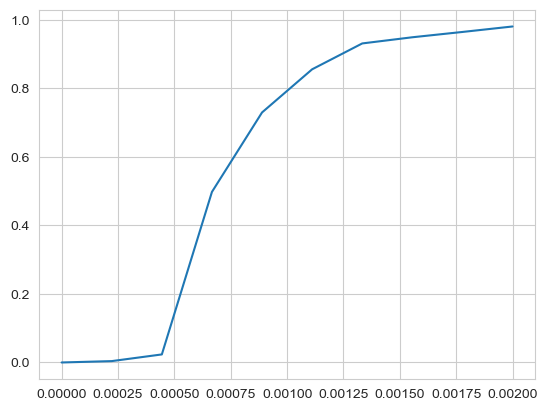

In [2]:
def plot_component_size(n, p_range, samples=1):
    lcc_sizes = []
    for p in tqdm(p_range, 'Running simulations'):
        tot = 0
        for i in range(samples):
            network = pp.generators.random_graphs.ER_np(n, p)
            size = tot + pp.algorithms.components.largest_component_size(network)
        lcc_sizes.append(size/n)
    plt.plot(p_range, lcc_sizes)
    plt.show()

p_range = np.linspace(0, 4/2000, num=10)
plot_component_size(2000, p_range, samples=10)

That's interesting. Rather than linearly increasing with the connection probability $p$, we observe a non-linear behaviour of the relative size of the largest connected component. For small values of $p$, almost no nodes are part of the largest connected component, i.e. the network only consists of small components that contain only few nodes. Beyond a certain critical point, the size of the largest connected component quickly grows as we increase the connection probability $p$, until it comprises almost all nodes. 

Note that this transition from a phase in which the network consists of small disconnected components and a phase in which almost all nodes are part of a single connected component occurs within a very small range for the parameter $p$. This behaviour is a paradigmatic example for a phase transition, i.e. a point in the parameter space of a simple model at which the properties of a complex system change abruptly.

Let us explore what happens if we change the size of the network.

C:\Users\INGOSC~1\AppData\Local\Temp/ipykernel_27872/1676659683.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for p in tqdm(p_range, 'Running simulations'):


Running simulations:   0%|          | 0/20 [00:00<?, ?it/s]

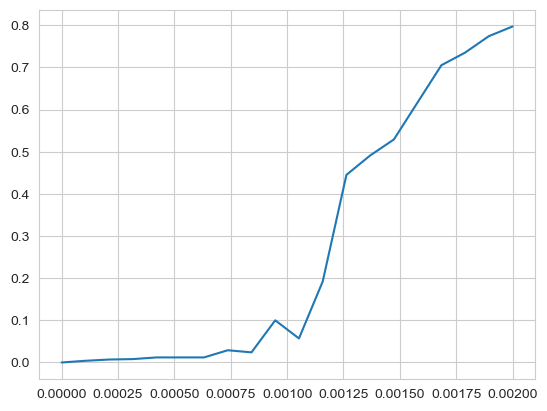

In [3]:
p_range = np.linspace(0, 4/2000, num=20)
plot_component_size(1000, p_range, samples=10)

We find the same behaviour, however the phase transition between the disconnected and the connected phase occurs at a different critical point, which is much larger than before.

In the lecture, we will explain this phase transition and we will learn how to analytically calculate the point for the Molloy-Reed model. Since the Molloy-Reed model can be seen as a generalization of the Erdös-Renyi model for networks with arbitrary degree distributions, we can use this result to predict the critical points that we observed above.